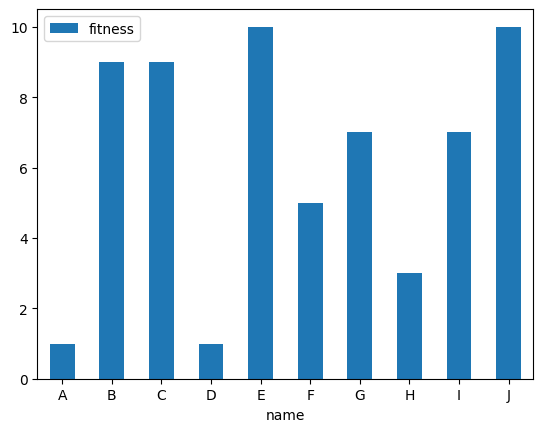

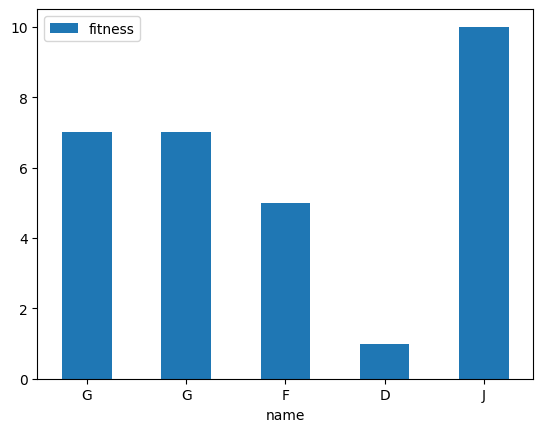

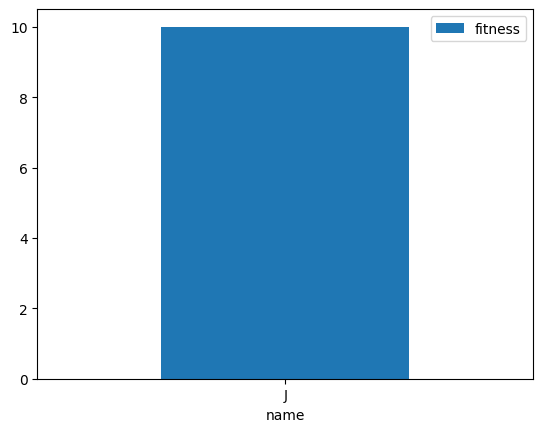

In [1]:
#토너먼트 선택
import random
import pandas as pd
import matplotlib.pyplot as plt
from advance_preparation import Individual

POPULATION_SIZE = 10
TOURNAMENT_SIZE = 5

population = Individual.create_random_population(POPULATION_SIZE) #모집단 설정

candidates = [random.choice(population) for _ in range(TOURNAMENT_SIZE)] #하위 집단 설정
best = [max(candidates, key = lambda ind: ind.fitness)] #적합도가 가장 높은 값 선택


def plot_individuals(individual_set):   #시각화
    df = pd.DataFrame({'name': [ind.name for ind in individual_set],'fitness': [ind.fitness for ind in individual_set]})
    df.plot.bar(x = 'name', y = 'fitness', rot = 0)

plt.show()
plot_individuals(population)
plot_individuals(candidates)
plot_individuals(best)

In [18]:
#토너먼트 선택 함수화
def selection_tournament(individuals, group_size = 2):
    selected = []
    for _ in range(len(individuals)):
        candidates = [random.choice(individuals) for _ in
        range(group_size)]
        selected.append(max(candidates, key = lambda ind: ind.fitness))
    return selected


In [20]:
#토너먼트 선택 함수 실행
import random
from advance_preparation import Individual

POPULATION_SIZE = 10
#random.seed(5) 고정된 난수값만 출력
population = Individual.create_random_population(POPULATION_SIZE) #모집단 설정
selected = selection_tournament(population, group_size = 3)  
print(f"Population: {population}")
print(f"Selected: {selected}")

Population: [A: 9, B: 1, C: 5, D: 5, E: 6, F: 7, G: 6, H: 7, I: 5, J: 5]
Selected: [H: 7, A: 9, E: 6, H: 7, F: 7, A: 9, A: 9, A: 9, H: 7, G: 6]


B | fitness: 10, prob: 2%
K | fitness: 10, prob: 2%
O | fitness: 10, prob: 2%
U | fitness: 10, prob: 2%
b | fitness: 10, prob: 2%
e | fitness: 10, prob: 2%
u | fitness: 10, prob: 2%
{ | fitness: 10, prob: 2%
 | fitness: 10, prob: 2%
 | fitness: 10, prob: 2%
 | fitness: 10, prob: 2%
 | fitness: 10, prob: 2%
 | fitness: 10, prob: 2%
  | fitness: 10, prob: 2%
C | fitness: 9, prob: 2%
Q | fitness: 9, prob: 2%
S | fitness: 9, prob: 2%
Y | fitness: 9, prob: 2%
 | fitness: 9, prob: 2%
 | fitness: 9, prob: 2%
W | fitness: 8, prob: 1%
X | fitness: 8, prob: 1%
` | fitness: 8, prob: 1%
j | fitness: 8, prob: 1%
k | fitness: 8, prob: 1%
l | fitness: 8, prob: 1%
p | fitness: 8, prob: 1%
 | fitness: 8, prob: 1%
 | fitness: 8, prob: 1%
 | fitness: 8, prob: 1%
 | fitness: 8, prob: 1%
 | fitness: 8, prob: 1%
 | fitness: 8, prob: 1%
 | fitness: 8, prob: 1%
P | fitness: 7, prob: 1%
\ | fitness: 7, prob: 1%
_ | fitness: 7, prob: 1%
d | fitness: 7, prob: 1%
t | fitness: 7, prob: 1%
v | fitness

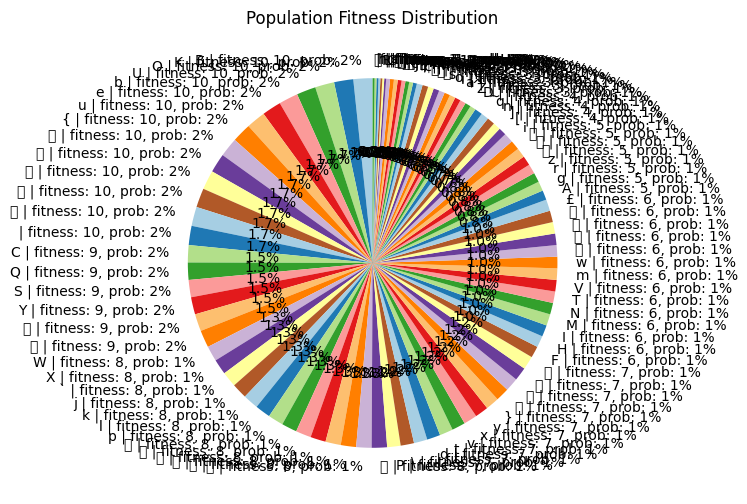

In [16]:
#비례적 선택
import random
import pandas as pd
import matplotlib.pyplot as plt
from advance_preparation import Individual

#random.seed(4) #고정된 난수 출력
POPULATION_SIZE = 100
unsorted_population = Individual.create_random_population(POPULATION_SIZE) #모집단 설정

population = sorted(unsorted_population, key = lambda ind:ind.fitness, reverse = True) #모집단 오름차순 정렬

fitness_sum = sum([ind.fitness for ind in population]) #전체 확률 계산
fitness_map = {}

for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'
    fitness_map[i_label] = i.fitness
    print(i_label)


fig, ax = plt.subplots(figsize=(6, 6)) #비레적 선택 시각화
ax.pie(
    fitness_map.values(), 
    labels=fitness_map.keys(), 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)
ax.set_title("Population Fitness Distribution")
plt.show()


In [23]:
#비례적 선택 함수화
import random
def selection_proportional(individuals):
    sorted_individuals = sorted(individuals, key = lambda ind:ind.fitness, reverse = True)
    fitness_sum = sum([ind.fitness for ind in individuals])
    selected = []
    for _ in range(len(sorted_individuals)):
        shave = random.random() * fitness_sum
        roulette_sum = 0
    for ind in sorted_individuals:
        roulette_sum += ind.fitness
        if roulette_sum > shave:
            selected.append(ind)
            break
    return selected

In [ ]:
#비례적 선택 함수 실행
import random
from advance_preparation import Individual

POPULATION_SIZE = 10
TURN_IT = 10
a = []
population = Individual.create_random_population(POPULATION_SIZE)
for i in range(TURN_IT):
    selected = selection_proportional(population)
    a.append(selected)
print(f"Population: {population}")
print(f"Selected: {a}")

Population: [A: 1, B: 9, C: 9, D: 10, E: 10, F: 6, G: 8, H: 10, I: 1, J: 4]
Selected: [[D: 10], [E: 10], [G: 8], [D: 10], [B: 9], [D: 10], [E: 10], [B: 9], [E: 10], [B: 9]]


{'A | fitness: 6, prob: 35%': 6}
{'A | fitness: 6, prob: 35%': 6, 'C | fitness: 4, prob: 24%': 4}
{'A | fitness: 6, prob: 35%': 6, 'C | fitness: 4, prob: 24%': 4, 'B | fitness: 3, prob: 18%': 3}
{'A | fitness: 6, prob: 35%': 6, 'C | fitness: 4, prob: 24%': 4, 'B | fitness: 3, prob: 18%': 3, 'E | fitness: 3, prob: 18%': 3}
{'A | fitness: 6, prob: 35%': 6, 'C | fitness: 4, prob: 24%': 4, 'B | fitness: 3, prob: 18%': 3, 'E | fitness: 3, prob: 18%': 3, 'D | fitness: 1, prob: 6%': 1}


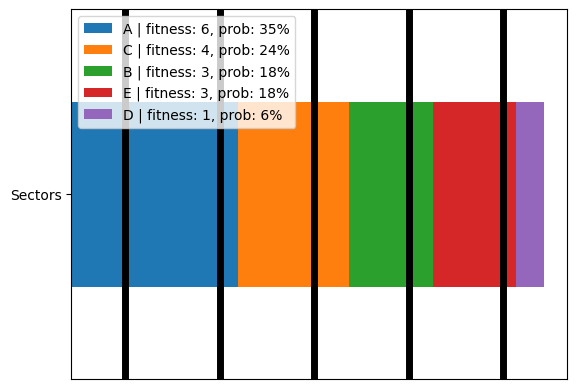

In [ ]:
#sus
import random
import pandas as pd
import matplotlib.pyplot as plt
from advance_preparation import Individual

POPULATION_SIZE = 5

unsorted_population = Individual.create_random_population(POPULATION_SIZE) #모집단 생성

population = sorted(unsorted_population, key = lambda ind:ind.fitness, reverse = True) #모집단 오름차순 정렬

fitness_sum = sum([ind.fitness for ind in population]) #총 적합도 계산

fitness_map = {}
for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'
    fitness_map[i_label] = i.fitness

#sus 시각화
index = ['Sectors']
df = pd.DataFrame(fitness_map, index = index)
df.plot.barh(stacked = True)
distance = fitness_sum / POPULATION_SIZE
shift = random.random() * distance
for i in range(POPULATION_SIZE):
    plt.axvline(x = shift + distance * i, linewidth = 5, color = 'black')
    plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)
plt.show()


In [26]:
#sus 함수화
def selection_stochastic_universal_sampling(individuals):
    sorted_individuals = sorted(individuals, key=lambda ind: ind.fitness, reverse=True ) #적합도 내림차순 정렬
    fitness_sum = sum(ind.fitness for ind in individuals) #적합도 값 계산
    distance = fitness_sum / len(individuals) #선택 간격 계산
    shift = random.uniform(0, distance) #시작점 지정
    borders = [shift + i * distance for i in range(len(individuals))] #선택 지점
    
    selected = []
    
    for border in borders:
        i = 0
        roulette_sum = sorted_individuals[i].fitness  # 초기값 설정
        
        # **무한 루프 방지: `roulette_sum`을 업데이트해야 함!**
        while roulette_sum < border and i < len(sorted_individuals) - 1:
            i += 1
            roulette_sum += sorted_individuals[i].fitness  # 업데이트
        
        selected.append(sorted_individuals[i])
    
    return selected



In [ ]:
#sus 함수 실행
from advance_preparation import Individual
POPULATION_SIZE = 10
population =Individual.create_random_population(POPULATION_SIZE)
selected = selection_stochastic_universal_sampling(population)
print(f"Population: {population}")
print(f"Selected: {selected}")

Population: [A: 2, B: 3, C: 3, D: 3, E: 9, F: 4, G: 5, H: 6, I: 10, J: 9]
Selected: [I: 10, I: 10, E: 9, J: 9, J: 9, H: 6, G: 5, F: 4, C: 3, A: 2]


22


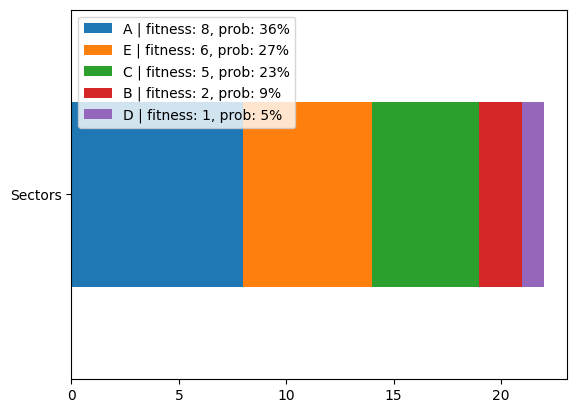

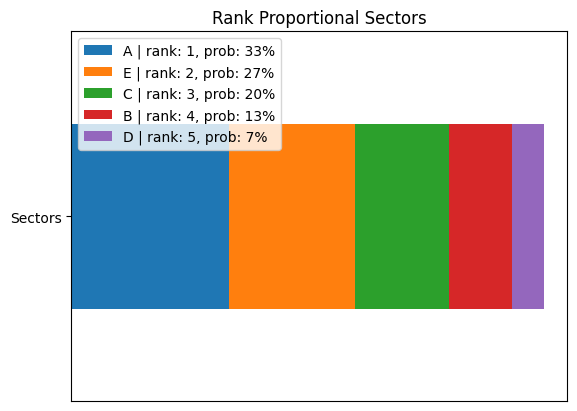

In [27]:
#순위 선택
import random
import pandas as pd
import matplotlib.pyplot as plt
from advance_preparation import Individual

POPULATION_SIZE = 5

unsorted_population = Individual.create_random_population(POPULATION_SIZE)

population = sorted(unsorted_population, key = lambda ind:ind.fitness, reverse = True)

fitness_sum = sum([ind.fitness for ind in population])
print(fitness_sum)
fitness_map = {}

for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'
    fitness_map[i_label] = i.fitness
    proportional_df = pd.DataFrame(fitness_map, index = ['Sectors'])
proportional_df.plot.barh(stacked = True) #이 씨발롱이 값이 나올떄마다 그래프를 그림

rank_step = 1 / POPULATION_SIZE

rank_sum = sum([1 - rank_step * i for i in range(len(population))])

rank_map = {}

for i in range(len(population)):
    i_rank = i + 1
    i_rank_proportion = 1 - i * rank_step
    i_prob = round(100 * i_rank_proportion / rank_sum)
    i_label = f'{population[i].name} | rank: {i_rank}, prob: {i_prob}%'
    rank_map[i_label] = i_rank_proportion

rank_df = pd.DataFrame(rank_map, index = ['Sectors'])
rank_df.plot.barh(stacked = True)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top =False, labelbottom = False)
plt.title('Rank Proportional Sectors')
plt.show()


In [2]:
#순위 선택 함수화
import random

def selection_rank(individuals):
    sorted_individuals = sorted(individuals, key = lambda ind:ind.fitness, reverse = True)
    rank_distance = 1 / len(individuals)
    ranks = [(1 - i * rank_distance) for i in range(len(individuals))]
    ranks_sum = sum(ranks)
    selected = []
    for _ in range(len(sorted_individuals)):
        shave = random.random() * ranks_sum
        rank_sum = 0
    for i in range(len(sorted_individuals)):
        rank_sum += ranks[i]
        if rank_sum > shave:
            selected.append(sorted_individuals[i])
            break
    return selected

In [ ]:
#순위 선택 함수 사용
import random
from advance_preparation import Individual

POPULATION_SIZE = 5
population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_rank(population)
print(f'Population: {population}')
print(f'Selected: {selected}')

Population: [A: 9, B: 6, C: 9, D: 8, E: 2]
Selected: [A: 9]


In [ ]:
#엘리트 선택 
import random

def selection_rank_with_elite(individuals, elite_size = 0):
    sorted_individuals = sorted(individuals, key = lambda ind:ind.fitness, reverse = True)
    rank_distance = 1 / len(individuals)
    ranks = [(1 - i * rank_distance) for i in range(len(individuals))]
    ranks_sum = sum(ranks)
    selected = sorted_individuals[0:elite_size]
    for i in range(len(sorted_individuals) - elite_size):
        shave = random.random() * ranks_sum
        rank_sum = 0
    for i in range(len(sorted_individuals)):
        rank_sum += ranks[i]
        if rank_sum > shave:
            selected.append(sorted_individuals[i])
            break
    return selected

In [ ]:
#엘리트 선택 
from advance_preparation import Individual
POPULATION_SIZE = 5
population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_rank_with_elite(population, elite_size = 2)
print(f"Population: {population}")
print(f"Population: {selected}")


Population: [A: 3, B: 7, C: 2, D: 2, E: 10]
Population: [E: 10, B: 7, C: 2]
